# [NTDS'18] milestone 2: network models
[ntds'18]: https://github.com/mdeff/ntds_2018

[Hermina Petric Maretic](https://people.epfl.ch/hermina.petricmaretic), [EPFL LTS4](https://lts4.epfl.ch)

## Students

* Team: `<your team number>`
* Students: `<the name of all students in the team>`
* Dataset: `<the dataset you used to complete the milestone>`

## Rules

* Milestones have to be completed by teams. No collaboration between teams is allowed.
* Textual answers shall be short. Typically one to two sentences.
* Code has to be clean.
* In the first part, you cannot import any other library than we imported. In the second part, you are allowed to import any library you want.
* When submitting, the notebook is executed and the results are stored. I.e., if you open the notebook again it should show numerical results and plots. We won't be able to execute your notebooks.
* The notebook is re-executed from a blank state before submission. That is to be sure it is reproducible. You can click "Kernel" then "Restart & Run All" in Jupyter.

## Objective

The purpose of this milestone is to explore various random network models, analyse their properties and compare them to your network. In the first part of the milestone you will implement two random graph models and try to fit them to your network. In this part you are not allowed to use any additional package. In the second part of the milestone you will choose a third random graph model that you think shares some properties with your network. You will be allowed to use additional packages to construct this network, but you must explain your network choice. Finally, make your code as clean as possible, and keep your textual answers short.

## Part 0

Import the adjacency matrix of your graph that you constructed in milestone 1, as well as the number of nodes and edges of your network.

In [36]:
import numpy as np

adjacency = np.load('adjacency.npy')
zero_index = np.where(np.sum(adjacency, axis=0) == 0)[0]
adjacency = np.delete(adjacency, zero_index, axis = 0)
adjacency = np.delete(adjacency, zero_index, axis = 1)

n_nodes =  np.count_nonzero(np.sum(adjacency, axis=0))
n_edges =  np.count_nonzero(adjacency) / 2

print('Number of nodes = {n:}'.format(n=n_nodes))
print('Number of edges = {e:}'.format(e=n_edges))

Number of nodes = 848
Number of edges = 8196.0


## Part 1

**For the computation of this part of the milestone you are only allowed to use the packages that have been imported in the cell below.**

In [43]:
%matplotlib inline

import random

import pandas as pd
import matplotlib.pyplot as plt
import scipy


### Question 1

Create a function that constructs an Erdős–Rényi graph.

In [44]:
def erdos_renyi(n, p, seed=None):
    """Create an instance from the Erdos-Renyi graph model.
    
    Parameters
    ----------
    n: int
        Size of the graph.
    p: float
        Edge probability. A number between 0 and 1.
    seed: int (optional)
        Seed for the random number generator. To get reproducible results.
    
    Returns
    -------
    adjacency
        The adjacency matrix of a graph.
    """
    
    np.random.seed(seed)
    
    # define adjacency of all zeros
    adjacency = np.zeros((n,n))
    
    for i in range(n):
        for j in range(n):
            if i >= j: continue
                
            # select a random number between 0 and 1
            num_rand = np.random.uniform(0,1)
            # construct link if less than p
            if num_rand < p:
                adjacency[i,j] = 1
                adjacency[j,i] = 1
    
    return adjacency

Text(0.5, 1.05, 'Erdos-Renyi (5, 0.6)')

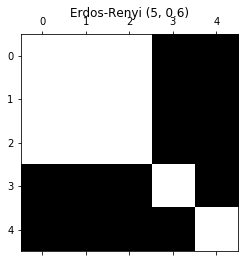

In [45]:
er = erdos_renyi(5, 0.6, 9765)
plt.spy(er)
plt.title('Erdos-Renyi (5, 0.6)')

Text(0.5, 1.05, 'Erdos-Renyi (10, 0.4)')

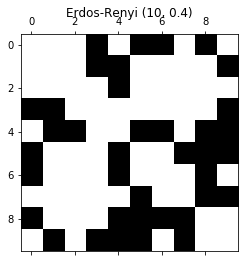

In [46]:
er = erdos_renyi(10, 0.4, 7648)
plt.spy(er)
plt.title('Erdos-Renyi (10, 0.4)')

### Question 2

Use the function to create a random Erdos-Renyi graph. Choose the parameters such that number of nodes is the same as in your graph, and the number of edges similar. You don't need to set the random seed. Comment on your choice of parameters.

In [66]:
p = np.sum(adjacency) / (n_nodes**2)
er = erdos_renyi(n_nodes, p)

plt.spy(er)
plt.title('Erdos-Renyi')
print('Number of nodes = {n:}'.format(n=len(er)))
print('Number of links = {l:}'.format(l=np.count_nonzero(er)/2))

NameError: name 'erdos_renyi' is not defined

**Answer:**
Having similar number of links is equivalent to having similar average clustering coefficient. From the lecture, we know that average clustering coefficient is equal to average degree divided by the number of nodes. Therefore, we can set the probability to p = average_degree / N

### Question 3

Create a function that constructs a Barabási-Albert graph.

In [24]:
def barabasi_albert(n, m, m0=0, seed=None):
    """Create an instance from the Barabasi-Albert graph model.
    
    Parameters
    ----------
    n: int
        Size of the graph.
    m: int
        Number of edges to attach from a new node to existing nodes.
    m0: int (optional)
        Number of nodes for the inital connected network.
    seed: int (optional)
        Seed for the random number generator. To get reproducible results.
    
    Returns
    -------
    adjacency
        The adjacency matrix of a graph.
    """
    #initialize network with two nodes connected 
    nodes = m0
    adjacency = np.zeros((nodes,nodes))
    
    #Set seed for reproducible results
    np.random.seed(seed)
    
    #Build initial network 
    if nodes == 2:
        #Connect the two existing links
        adjacency[0,1] = 1
        adjacency[1,0] = 1
    else:
        #Build initial network with at least one node per edge of size m0 starting from 2 connected nodes.
        adjacency = barabasi_albert(m0, 1, m0=2, seed=seed)
    
    
    for i in range(n-m0):
        
        #compute preference attachment
        #1. degree of all the existing nodes:
        degrees = np.sum(adjacency, axis=1)
        #2. probability distribution 
        prob = degrees/(np.sum(degrees))
        
        #Select to which nodes to connect
        n = np.array(list(range(nodes)))
        to_connect = np.random.choice(n, size=m, p=prob)
        
        #Expand Adjacency Matrix
        new_row = np.zeros((1,nodes))
        adjacency = np.vstack([adjacency, new_row])
        
        #Add connection to chosen nodes
        for i in to_connect:
            adjacency[nodes,i] = 1
        
        #Update adjacency matrix
        new_col = np.append(adjacency[nodes, :],[0])
        new_col = np.reshape(new_col,(new_col.shape[0],1))
        adjacency = np.hstack([adjacency, new_col])
        #print(adjacency.shape[0])
        
        #Update graph size
        nodes += 1
    
    return adjacency

Text(0.5, 1.05, 'Barabasi-Albert (5, 1)')

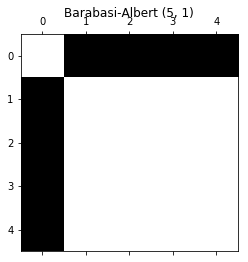

In [25]:
ba = barabasi_albert(5, 1, 2, 9087)
plt.spy(ba)
plt.title('Barabasi-Albert (5, 1)')

Text(0.5, 1.05, 'Barabasi-Albert (10, 2)')

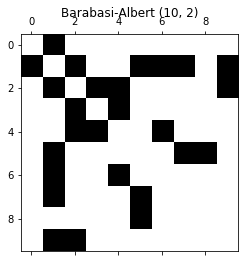

In [26]:
ba = barabasi_albert(10, 2, 3, 8708)
plt.spy(ba)
plt.title('Barabasi-Albert (10, 2)')

### Question 4

Use the function to create a random Barabási-Albert graph. Choose the parameters such that number of nodes is the same as in your graph, and the number of edges similar. You don't need to set the random seed. Comment on your choice of parameters.

Original number of edges: 8196.0
Barabási-Albert number of edges 8182.0
Original number of nodes: 848
Barabási-Albert number of nodes: 848


Text(0.5, 1.05, 'Barabasi-Albert (848, 10)')

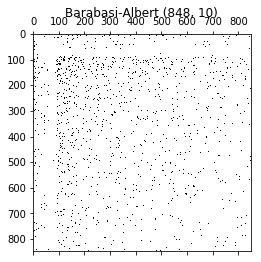

In [27]:
ba = barabasi_albert(n_nodes, 11, m0=95, seed=7272)
print('Original number of edges: {}\nBarabási-Albert number of edges {}'.format(n_edges, np.count_nonzero(ba)/2))
print('Original number of nodes: {}\nBarabási-Albert number of nodes: {}'.format(n_nodes, len(ba)))
plt.spy(ba)
plt.title('Barabasi-Albert (848, 10)')

**Your answer here**

### Definition of the new two network with the same nodes and edges as ours

In [52]:
p = np.sum(adjacency) / (n_nodes**2)
erdos_renyi_adj = erdos_renyi(n_nodes, p, seed=2727)
barabasi_albert_adj = barabasi_albert(n_nodes, 11, m0=95, seed=7272)

### Question 5

Compare the number of edges in all three networks (your real network, the Erdős–Rényi network, and the Barabási-Albert netowk).

In [53]:
er_n_edges = np.sum(np.count_nonzero(erdos_renyi_adj)/2)
ba_n_edges = np.sum(np.count_nonzero(barabasi_albert_adj)/2)

print("Our network number of edges = %d" %n_edges)
print("Erdos-Renyi number of edges = %d" %er_n_edges)
print("Barabasi-Albert number of edges = %d" %ba_n_edges)

Our network number of edges = 8196
Erdos-Renyi number of edges = 8252
Barabasi-Albert number of edges = 8182


### Question 6

Implement a function that computes the [Kullback–Leibler (KL) divergence](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence) between two probability distributions.
We'll use it to compare the degree distributions of networks.

In [54]:
def kl_divergence(p, q):
    """Compute the KL divergence between probability distributions of degrees of two networks.
    
    Parameters
    ----------
    p: np.array
        Probability distribution of degrees of the 1st graph.
    q: np.array
        Probability distribution of degrees of the 2nd graph.
    
    Returns
    -------
    kl
        The KL divergence between the two distributions.
    """
    
    return np.sum(p * np.log(np.divide(p, q)))

In [55]:
p_test = np.array([0.2, 0.2, 0.2, 0.4])
q_test = np.array([0.3, 0.3, 0.1, 0.3])
kl_divergence(p_test, q_test)

0.09151622184943575

### Question 7

Compare the degree distribution of your network to each of the two synthetic ones, in terms of KL divergence. **Hint:** Make sure you normalise your degree distributions to make them valid probability distributions.

In [56]:
def degree_distribution(adjacency):
    return np.sum(adjacency, axis=1)

In [57]:
def normalised_degree_distribution(adjacency):
    degree_distr = degree_distribution(adjacency)
    total_sum = np.sum(degree_distr)
    
    return degree_distr / total_sum

In [58]:
norm_degree_distr = normalised_degree_distribution(adjacency)
er_norm_degree_distr = normalised_degree_distribution(erdos_renyi_adj)
ba_norm_degree_distr = normalised_degree_distribution(barabasi_albert_adj)

print("KL(our network | erdos-renyi) = %f" %kl_divergence(
    norm_degree_distr, er_norm_degree_distr))
print("KL(our network | barbasi-albert) = %f" %kl_divergence(
    norm_degree_distr, ba_norm_degree_distr))

KL(our network | erdos-renyi) = 0.157358
KL(our network | barbasi-albert) = 0.296017


### Question 8

Plot the degree distribution historgrams for all three networks. Are they consistent with the KL divergence results? Explain.

Our degree distribution


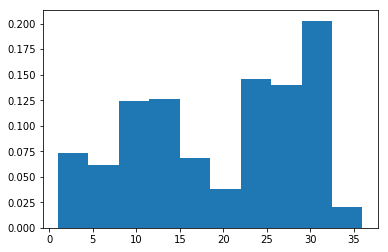

In [59]:
print("Our degree distribution")
o_degree_distr = degree_distribution(adjacency)
o_weights = np.ones_like(o_degree_distr) / float(n_nodes)
plt.hist(o_degree_distr, weights=o_weights);

Erdos-Renyi degree distribution


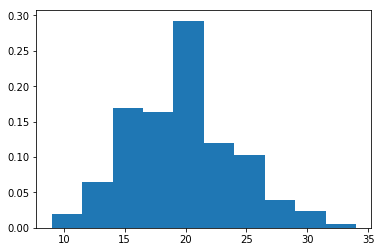

In [60]:
print("Erdos-Renyi degree distribution")
er_degree_distrib = degree_distribution(erdos_renyi_adj)
er_weights = np.ones_like(er_degree_distrib) / float(n_nodes)
plt.hist(er_degree_distrib, weights=er_weights);

Barabasi-Albert degree distribution


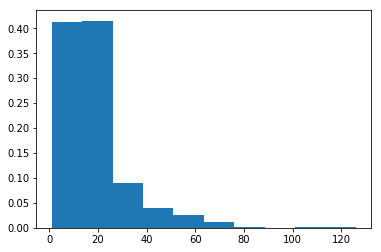

In [61]:
print("Barabasi-Albert degree distribution")
ba_degree_distrib = degree_distribution(barabasi_albert_adj)
ba_weights = np.ones_like(ba_degree_distrib) / float(n_nodes)
plt.hist(ba_degree_distrib, weights=ba_weights);

**Your answer here.**

### Question 9

Imagine you got equal degree distributions. Would that guarantee you got the same graph? Explain.

**Your answer here.**

## Part 2

**You are allowed to use any additional library here (e.g., NetworkX, PyGSP, etc.).** Be careful not to include something here and use it in part 1!

In [39]:
import pygsp
import matplotlib.pyplot as plt


In [40]:
def compute_diameter(adjacency):
    """returns the diameter of the provided graph.\
    Returns diameter (length of the longest shortest path between any pair of nodes)"""
    
    # number of nodes in the graph
    list_of_nodes = np.where(np.sum(adjacency, axis=1) > 0)[0]
    # initialize diameter to be 0
    diameter = 0
    
    for _, node in enumerate(list_of_nodes):
        shortest_path_lengths = compute_shortest_path_lengths(adjacency, node)
        
        # exclude infinite distances i.e. disconnected nodes
        shortest_path_lengths = shortest_path_lengths[shortest_path_lengths != float('inf')]
        max_s = max(shortest_path_lengths)
        
        if max_s > diameter:
            diameter = max_s
    
    return int(diameter)

In [76]:
def compute_shortest_path_lengths(adjacency, source):
    """Compute the shortest path length between a source node and all nodes.
    
    Parameters
    ----------
    adjacency: numpy array
        The (weighted) adjacency matrix of a graph.
    source: int
        The source node. A number between 0 and n_nodes-1.
    
    Returns
    -------
    list of ints
        The length of the shortest path from source to all nodes. Returned list should be of length n_nodes.
    """
    
    shortest_path_lengths = np.zeros(len(adjacency)) - 1
    visited_dict = breadth_first_search(adjacency, source)
    
    list_visited_values = list(visited_dict.values())
    list_visited_keys = list(visited_dict.keys())
    
    for node in range(len(adjacency)):
        for n in range(len(list_visited_values)):
                if node in list(list_visited_values)[n]:
                    # the keys in the distionary are hop distances
                    shortest_path_length = list_visited_keys[list_visited_values.index(list_visited_values[n])]
                    shortest_path_lengths[node] = int(shortest_path_length)
        
    # entries whose values are -1 mean they were disconnected
    shortest_path_lengths[shortest_path_lengths == -1] = float('inf')
    
    return shortest_path_lengths

In [78]:
# define breadth first search algorithm which will be useful for answering some of questions 7 - 14

def breadth_first_search(graph, start):
    '''Takes the adjacencay matrix (graph) and the startin vertex.
    Returns a dictionary whose keys represent (hop) distance from start vertex\
    and values represent all vertices located at that distance from start vertex.
    Only the shortest path is counted.'''
    
    # define a set for all visited nodes.
    visited = set()
    # define dictionary; keys are distances; values are vertices at that distance (from start vertex)
    visited_dict = dict({0: {start}})
    # define a set to keep track of all searched nodes in the BFS algorithm
    searched = set([start])
    
    # all vertices found in the process of BFS are added to the list
    queue = [start]
    while queue:
        # next vertex in the queue
        vertex = queue.pop(0)
        
        if vertex not in visited:
            visited.add(vertex)
            
            # define all the neighbors of the current vertex
            neighbors = set([i for i, x in enumerate(adjacency[vertex]) if x==1])
            
            # get key of current vertex
            for n in range(len(list(visited_dict.values()))):
                if vertex in list(visited_dict.values())[n]:
                    key = list(visited_dict.keys())[list(visited_dict.values()).index(list(visited_dict.values())[n])]

            # create a new key if key + 1 does not exist yet
            if visited_dict.get(key+1) == None: 
                visited_dict.update({key+1: set()}) # define an empty set for the value of new key
            # update the value of the new key
            visited_dict.get(key+1).update(neighbors - searched)
            searched.update(neighbors)
            
            # add only ones that have not yet been visited to the queue
            queue.extend(neighbors - visited)
    return visited_dict

### Question 10

Choose a random network model that fits you network well. Explain your choice. 

**Hint:** Check lecture notes for different network models and their properties. Your choice should be made based on at least one property you'd expect to be similar.

**Your answer here.**

2018-11-07 11:52:07,777:[INFO](pygsp.graphs.community.__init__): Constructed using community density = 0.02279503381986472


14


Text(0.5, 1.05, 'Barabasi-Albert (5, 1)')

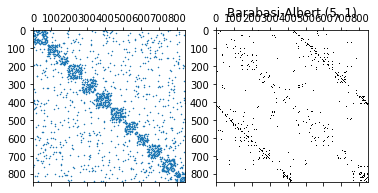

In [79]:

G = pygsp.graphs.Community(N=848, Nc=12, min_comm=None, min_deg=0, comm_sizes=None, size_ratio=1, world_density=None, comm_density=p, k_neigh=None, epsilon=None, seed=None)
fig, axes = plt.subplots(1, 2)
_ = axes[0].spy(G.W, markersize=0.5)
m = G.W.todense()

print(compute_diameter(m))
plt.spy(adjacency)
plt.title('Barabasi-Albert (5, 1)')

In [80]:
adj_ba = np.array(G.W)
#compute_diameter(adj_ba)

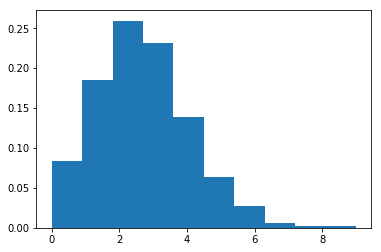

In [83]:
degree =  m.sum(axis=1)
weights = np.ones_like(degree) / float(n_nodes)
plt.hist(degree, weights=weights, bins =10);

### Question 11

Explain (in short) how the chosen model works.

**Your answer here.**

### Question 12

Create a random graph from that model, such that the number of nodes is the same as in your graph.

In [ ]:
# Your code here.

### Question 13

Check the properties you expected to be similar, and compare to your network.

In [ ]:
# Your code here.

Are the results what you expected? Explain.

**Your answer here.**